In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [4]:
data_df = pd.read_csv("../src/data/give_me_credit/give_me_credit_data.csv")
data_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt
0,1,0.766127,45,2,9120.0,13,0,6,0,2.0,7323.197016
1,0,0.957151,40,0,2600.0,4,0,0,0,1.0,316.878123
2,0,0.658180,38,1,3042.0,2,1,0,0,0.0,258.914887
3,0,0.233810,30,0,3300.0,5,0,0,0,0.0,118.963951
4,0,0.907239,49,1,63588.0,7,0,1,0,0.0,1584.975094
...,...,...,...,...,...,...,...,...,...,...,...
120264,0,0.385742,50,0,3400.0,7,0,0,0,0.0,1374.595707
120265,0,0.040674,74,0,2100.0,4,0,1,0,0.0,472.774869
120266,0,0.299745,44,0,5584.0,4,0,1,0,2.0,4001.283436
120267,0,0.000000,30,0,5716.0,4,0,0,0,0.0,0.000000


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = data_df.iloc[:,1:], data_df.iloc[:,0]
# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/yabutamidori/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9301155732934231

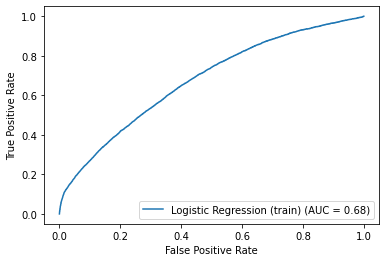

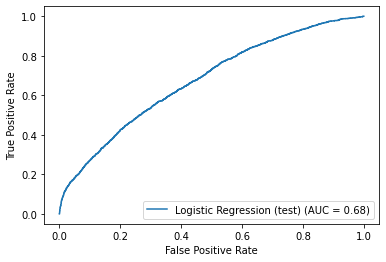

In [13]:
# from sklearn.metrics import RocCurveDisplay

# logistic_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

from sklearn import metrics

metrics.plot_roc_curve(clf, X_train, y_train, name="Logistic Regression (train)") 
metrics.plot_roc_curve(clf, X_test, y_test, name="Logistic Regression (test)") 
plt.show()